In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#!pip install tensorflow
#import tensorflow as tf

hotel_bookings_df = pd.read_csv('competencia_icd_train.csv')

hotel_bookings_df.head()

,hotel,arrival_date_month,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,market_segment,distribution_channel,previous_cancellations,lead_time,booking_changes,deposit_type,customer_type,is_canceled
0,City Hotel,April,2016,15,4,1,4,2,0.0,0,FIN,Online TA,TA/TO,0,67,0,No Deposit,Transient,1
1,City Hotel,July,2016,28,7,1,3,2,0.0,0,USA,Direct,Direct,0,24,0,No Deposit,Transient,1
2,Resort Hotel,November,2016,49,29,0,2,2,0.0,0,SWE,Corporate,Corporate,0,76,0,No Deposit,Transient-Party,0
3,City Hotel,July,2017,30,29,0,1,2,2.0,0,DEU,Online TA,TA/TO,0,159,1,No Deposit,Transient,0
4,City Hotel,April,2016,15,5,0,2,2,0.0,0,PRT,Groups,TA/TO,0,104,0,Non Refund,Transient,1


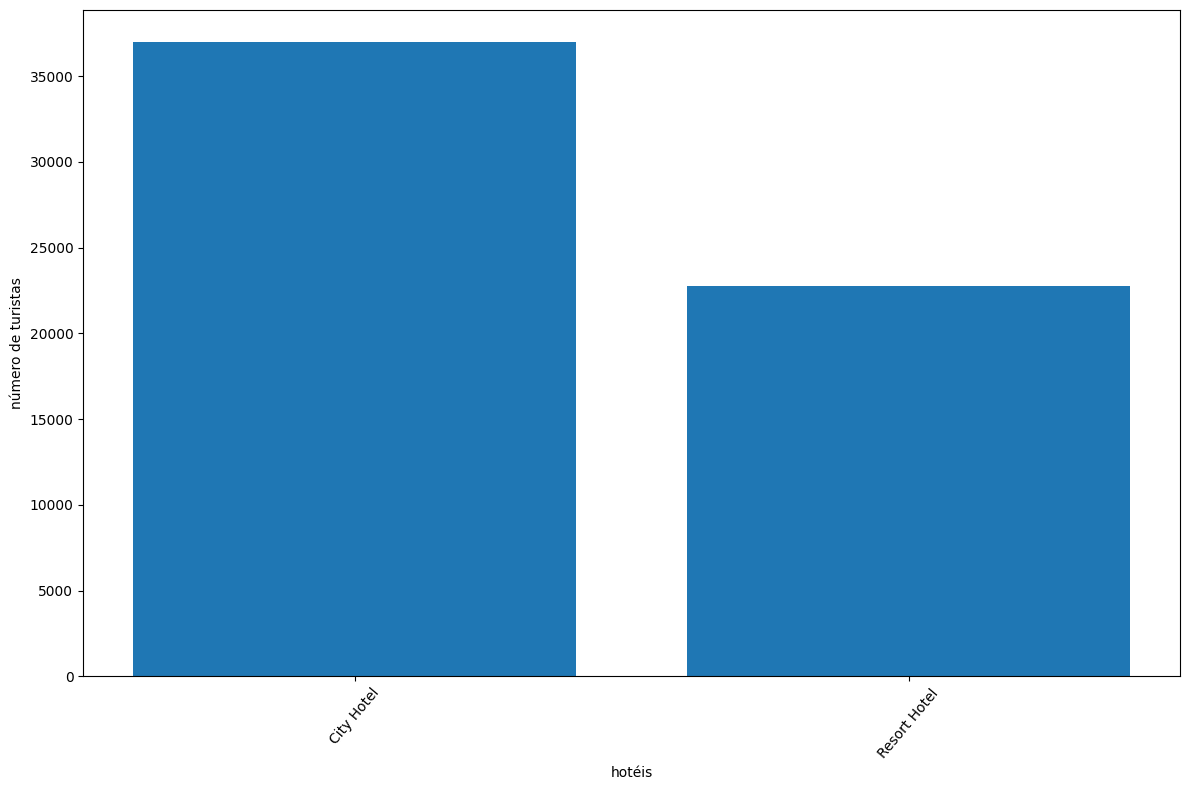

In [ ]:
hotel_receptions = hotel_bookings_df[hotel_bookings_df['is_canceled'] == 0]['hotel'].value_counts()

hoteis = hotel_bookings_df['hotel'].unique()

plt.figure(figsize=(12,8))

plt.bar(hoteis, hotel_receptions)

plt.xlabel('hotéis')
plt.ylabel('número de turistas')

plt.xticks(rotation=50)

plt.tight_layout()
plt.show()

In [ ]:
from datetime import datetime

def stringToMonthNum(m_string):
  data = datetime.strptime(m_string.lower().strip(), '%B')
  n_month = data.month
  return n_month

In [ ]:
def monthNumToString(row):
  data = datetime(year=row['arrival_date_year'], month=row['arrival_date_month'], day=row['arrival_date_day_of_month'])
  month_string = data.strftime('%B')
  return month_string

In [ ]:
hotel_bookings_df['arrival_date_month'] = hotel_bookings_df['arrival_date_month'].apply(stringToMonthNum)

hotel_bookings_df = hotel_bookings_df.sort_values(by='arrival_date_month')

hotel_bookings_df['arrival_date_month'] = hotel_bookings_df.apply(monthNumToString, axis=1)

resort = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'Resort Hotel') & (hotel_bookings_df['is_canceled'] == 0)]
city_hotel = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'City Hotel') & (hotel_bookings_df['is_canceled'] == 0)]

resort = resort.groupby(['arrival_date_month'], sort=False).mean()
city_hotel = city_hotel.groupby(['arrival_date_month'], sort=False).mean()

plt.figure(figsize=(12,8))

plt.plot(resort, label='Resort Hotel',color='red')
plt.plot(city_hotel, label='City Hotel',color='yellow')

plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
hotel_bookings_df.isna().sum()

,0
hotel,0
arrival_date_month,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


In [ ]:
htl_bks_filtrado_df = hotel_bookings_df.drop(['arrival_date_month', 'arrival_date_week_number'], axis=1)
htl_bks_filtrado_df.columns

Index(['hotel', 'arrival_date_year', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'market_segment', 'distribution_channel',
       'previous_cancellations', 'lead_time', 'booking_changes',
       'deposit_type', 'customer_type', 'is_canceled'],
      dtype='object')

In [ ]:
str_columns = ['customer_type','deposit_type','distribution_channel', 'hotel', 'market_segment']

htl_bks_strings = hotel_bookings_df[str_columns]

htl_bks_filtrado_df = htl_bks_filtrado_df.drop(str_columns, axis=1)

htl_bks_filtrado_df.head()

,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,previous_cancellations,lead_time,booking_changes,is_canceled
81698,2016,23,1,1,1,0.0,0,BEL,0,45,0,1
95061,2017,15,3,5,2,0.0,0,CYP,0,58,0,0
64,2017,26,1,3,2,0.0,0,GBR,0,193,0,0
55860,2017,24,0,1,1,0.0,0,ESP,0,43,0,0
81721,2017,14,0,1,1,0.0,0,PRT,0,4,0,0


In [ ]:
htl_bks_strings['hotel'] = htl_bks_strings['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

<ipython-input-12-c81bf6952c96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htl_bks_strings['hotel'] = htl_bks_strings['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})


In [ ]:
htl_bks_strings['distribution_channel'] = htl_bks_strings['distribution_channel'].map({'Corporate': 0, 'Direct': 1, 'GDS': 2, 'TA/TO': 3, 'Undefined': 4})

<ipython-input-13-4a73dd70502d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htl_bks_strings['distribution_channel'] = htl_bks_strings['distribution_channel'].map({'Corporate': 0, 'Direct': 1, 'GDS': 2, 'TA/TO': 3, 'Undefined': 4})


In [ ]:
htl_bks_strings['market_segment']  = htl_bks_strings['market_segment'].map({'Aviation': 0, 'Corporate': 1, 'Complementary': 2,'Direct': 3, 'Groups': 4,'Online TA': 5, 'Offline TA/TO': 6, 'Undefined': 7})

<ipython-input-14-7c10fd6234a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htl_bks_strings['market_segment']  = htl_bks_strings['market_segment'].map({'Aviation': 0, 'Corporate': 1, 'Complementary': 2,'Direct': 3, 'Groups': 4,'Online TA': 5, 'Offline TA/TO': 6, 'Undefined': 7})


In [ ]:
htl_bks_strings['deposit_type'] = htl_bks_strings['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})

<ipython-input-15-f6d2b44e2061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htl_bks_strings['deposit_type'] = htl_bks_strings['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})


In [ ]:
htl_bks_strings['customer_type'] = htl_bks_strings['customer_type'].map({'Contract': 0, 'Group': 1, 'Transient': 2, 'Transient-Party': 3})

<ipython-input-16-f19d21b3bb39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htl_bks_strings['customer_type'] = htl_bks_strings['customer_type'].map({'Contract': 0, 'Group': 1, 'Transient': 2, 'Transient-Party': 3})


In [ ]:
htl_bks_strings.head(15)

,customer_type,deposit_type,distribution_channel,hotel,market_segment
81698,2,0,3,1,5
95061,3,0,3,1,4
64,2,0,3,1,5
55860,2,0,2,1,5
81721,3,0,3,0,4
25241,2,0,3,1,5
4771,3,0,3,1,4
46484,2,1,1,0,4
46503,2,0,1,0,3
91665,3,0,3,0,5


In [ ]:
htl_bks_filtrado_df.isna().sum()

,0
arrival_date_year,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0
country,0
previous_cancellations,0
lead_time,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


hotel_bookings_df = pd.read_csv('competencia_icd_train.csv')

In [ ]:
def label_encode_columns(df):
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
    return df

In [ ]:
df_one_hot_encoded = label_encode_columns(hotel_bookings_df)

In [ ]:
sc = StandardScaler()

X = df_one_hot_encoded

In [ ]:
X = X[~((X['adults'] == 0) & (X['babies'] == 0) & (X['children'] == 0))]


In [ ]:
correlation = X.corr(method='spearman')

Z_score = (X - X.mean()) / X.std()

X = X[(Z_score < 3) & (Z_score > -3)]

y = X['is_canceled']

X.drop(['is_canceled'], inplace=True, axis=1)

In [ ]:
X = X.fillna(0)

v = X.value_counts()

X = sc.fit_transform(X)

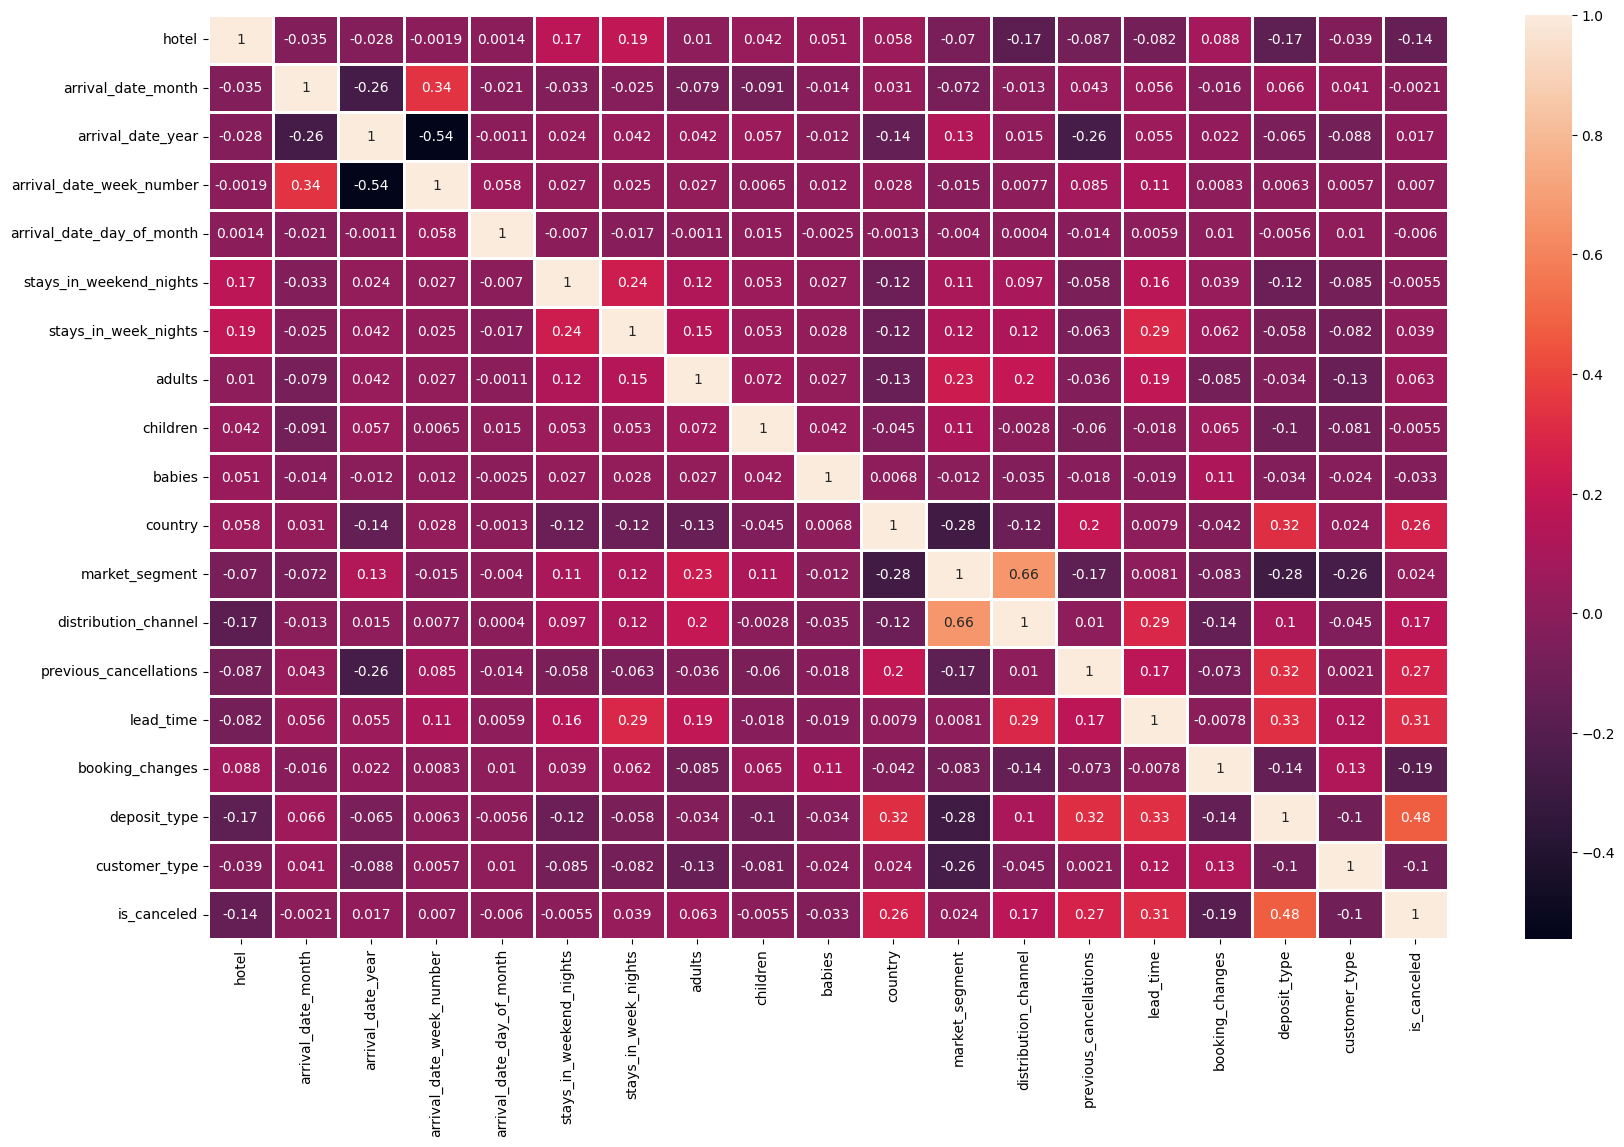

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,12))
sns.heatmap(correlation, annot=True, linewidths=1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#pip install tensorflow --upgrade

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, PReLU
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Dropout, GRU

In [ ]:
model = Sequential()
model.add(Dense(units=27, input_dim=18))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation=PReLU()))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation=PReLU()))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_test, y_test))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7600 - loss: 0.1618 - val_accuracy: 0.7879 - val_loss: 0.1409
Epoch 2/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7823 - loss: 0.1424 - val_accuracy: 0.7906 - val_loss: 0.1356
Epoch 3/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7851 - loss: 0.1396 - val_accuracy: 0.7952 - val_loss: 0.1339
Epoch 4/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7905 - loss: 0.1374 - val_accuracy: 0.7975 - val_loss: 0.1338
Epoch 5/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7924 - loss: 0.1361 - val_accuracy: 0.7964 - val_loss: 0.1319
Epoch 6/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7886 - loss: 0.1371 - val_accuracy: 0.7965 - val_loss: 0.1312
Epoch 7/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7908 - loss: 0.1358 - val_accuracy: 0.7961 - val_loss: 0.1316
Epoch 8/30
1710/1710 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7891 - loss: 0.136

In [ ]:
model = Sequential()
model.add(Dense(units=27, input_dim=18))
model.add(Dense(units=128, activation=PReLU()))
model.add(Dense(units=128, activation=PReLU()))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(X_train, y_train, epochs=30, batch_size=25, validation_data=(X_test, y_test))

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

score = accuracy_score(y_test, y_pred)

nn_classification_report = classification_report(y_test, y_pred)

print(f'Multi-Layer Perceptron Classifier accuracy: {score}')
print(nn_classification_report)

297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Multi-Layer Perceptron Classifier accuracy: 0.8029266238551427
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      5950
           1       0.81      0.62      0.70      3549

    accuracy                           0.80      9499
   macro avg       0.80      0.77      0.78      9499
weighted avg       0.80      0.80      0.80      9499



In [ ]:
hotel_bookings_predict_df = pd.read_csv('competencia_icd_test.csv')

In [ ]:
X_test2 = label_encode_columns(hotel_bookings_predict_df)


In [ ]:
y_test2 = model.predict(X_test2)
y_test2

744/744 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
X_test2["is_canceled"] = y_test2 # Agregamos la prediccion a una columna con el nombre de "IS_CANCELED"
X_test2 = X_test2[["is_canceled"]] # me quedo solo con la columna de 0 y 1 que nos dice si nos va a cancelar o no
X_test2 = X_test2.reset_index().rename(columns = {"index": "id"})
X_test2.head()

,id,is_canceled
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [ ]:
#exportamos solo los resultados que predijo el modelo a un excel.
X_test2.to_csv("test_pred_KNN.csv", index = False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

rf_scores = cross_val_score(rf, X_test, y_test, cv=kf, scoring='accuracy')

rf_predict = rf.predict(X_test)

rf_classification_report = classification_report(y_test, rf_predict)

print(f'RandomForest Score: {rf_scores.mean()}')
print(f'Classification report:\n {rf_classification_report}')

RandomForest Score: 0.8097715046309135
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      5950
           1       0.83      0.73      0.77      3549

    accuracy                           0.84      9499
   macro avg       0.84      0.82      0.83      9499
weighted avg       0.84      0.84      0.84      9499



In [ ]:
y_test3 = rf.predict(X_test2)
X_test2["is_canceled"] = y_test3 # Agregamos la prediccion a una columna con el nombre de "IS_CANCELED"
X_test2 = X_test2[["is_canceled"]] # me quedo solo con la columna de 0 y 1 que nos dice si nos va a cancelar o no
X_test2 = X_test2.reset_index().rename(columns = {"index": "id"})
X_test2.head()

ValueError: X has 2 features, but RandomForestClassifier is expecting 18 features as input.

In [ ]:
X_test2.to_csv("test_pred_RF.csv", index = False)

In [ ]:
RDfrom sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=33, weights='distance', p=1, metric='euclidean', algorithm='brute')
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

knn_scores = cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy')
knn_classification_report = classification_report(y_test, knn_predict)

print(f'K-NN Score: {knn_scores.mean()}')
print(f'Classification report K-NN: \n {knn_classification_report}')

K-NN Score: 0.7884001996561477
Classification report K-NN: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      5950
           1       0.83      0.67      0.74      3549

    accuracy                           0.83      9499
   macro avg       0.83      0.79      0.81      9499
weighted avg       0.83      0.83      0.82      9499



In [ ]:
knn_predict = knn.predict(X_test2)
X_test2["is_canceled"] = knn_predict # Agregamos la prediccion a una columna con el nombre de "IS_CANCELED"
X_test2 = X_test2[["is_canceled"]] # me quedo solo con la columna de 0 y 1 que nos dice si nos va a cancelar o no
X_test2 = X_test2.reset_index().rename(columns = {"index": "id"})
X_test2.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,id,is_canceled
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [ ]:
X_test2.to_csv("test_pred_KNN.csv", index = False)